# Project 8 -- Dwijen Chawra

## Question 1

In [2]:
!pip install kaleido

Defaulting to user installation because normal site-packages is not writeable


pqdata desc--------------------------
         date             datetime  SACTMIN  SPOSTMIN            ride_name
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0  kilimanjaro_safaris
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0  kilimanjaro_safaris
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0  kilimanjaro_safaris
3  01/01/2015  2015-01-01 08:12:23      NaN      10.0  kilimanjaro_safaris
4  01/01/2015  2015-01-01 08:19:26      NaN      10.0  kilimanjaro_safaris
5  01/01/2015  2015-01-01 08:26:23      NaN      10.0  kilimanjaro_safaris
6  01/01/2015  2015-01-01 08:32:23      NaN      10.0  kilimanjaro_safaris
7  01/01/2015  2015-01-01 08:40:24      NaN      10.0  kilimanjaro_safaris
8  01/01/2015  2015-01-01 08:47:22      NaN      10.0  kilimanjaro_safaris
9  01/01/2015  2015-01-01 08:54:25      NaN       5.0  kilimanjaro_safaris
meta desc--------------------------
         DATE WDW_TICKET_SEASON  DAYOFWEEK  DAYOFYEAR  WEEKOFYEAR  \
0  01/01/2015               NaN 

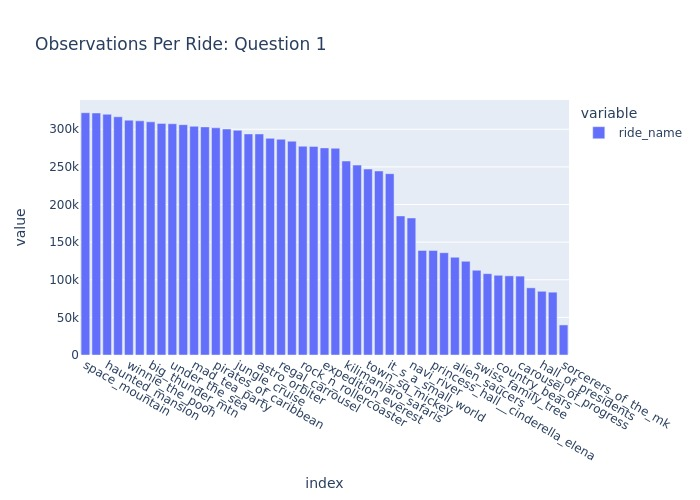

In [ ]:
import plotly.express as px
import pandas as pd

pqdata = pd.read_parquet('/anvil/projects/tdm/data/disney/total.parquet')
meta = pd.read_csv("/anvil/projects/tdm/data/disney/metadata.csv")

print("pqdata desc--------------------------")
print(pqdata.head(10))
pd.set_option('display.max_columns', None)  

print("meta desc--------------------------")
print(meta.head(1))


# pqdata['ride_name'].value_counts()

fig = px.bar(pqdata['ride_name'].value_counts(), title="Observations Per Ride: Question 1")
fig.update_xaxes(tickangle=30)

fig.show(renderer="jpg")

## Question 2

In [34]:
pqdata["year"] = pd.to_datetime(pqdata["date"]).dt.year
pqdata["month"] = pd.to_datetime(pqdata["date"]).dt.month
pqdata["day"] = pd.to_datetime(pqdata["date"]).dt.day

meta["year"] = pd.to_datetime(meta["DATE"]).dt.year
meta["month"] = pd.to_datetime(meta["DATE"]).dt.month
meta["day"] = pd.to_datetime(meta["DATE"]).dt.day

            ride_name   date  datetime  SACTMIN  SPOSTMIN  month    day
year                                                                   
2015   7_dwarfs_train  56125     56125     1174     54951  56125  56125
2016   7_dwarfs_train  43868     43868      979     42889  43868  43868
2017   7_dwarfs_train  47472     47472      742     46730  47472  47472
2018   7_dwarfs_train  53428     53428      809     52619  53428  53428
2019   7_dwarfs_train  49983     49983      808     49175  49983  49983
...               ...    ...       ...      ...       ...    ...    ...
2017  winnie_the_pooh  46154     46154      511     45643  46154  46154
2018  winnie_the_pooh  52246     52246      569     51677  52246  52246
2019  winnie_the_pooh  48664     48664      469     48195  48664  48664
2020  winnie_the_pooh  16069     16069      335     15734  16069  16069
2021  winnie_the_pooh  52387     52387     1453     50934  52387  52387

[303 rows x 7 columns]
     year        ride_name   date  datet

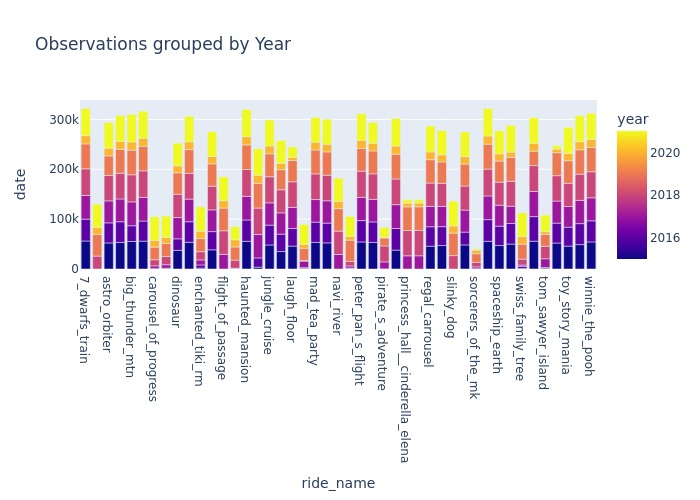

In [47]:
grouped = pqdata.groupby(['ride_name', 'year']).count()


grouped.reset_index("ride_name", inplace=True)
print(grouped)
# grouped.reset_index(level="year", col_level=1, col_fill="year", inplace=True)
# print(grouped)
grouped.reset_index("year", inplace=True)
print(grouped)

fig = px.bar(grouped, x="ride_name", y="date", color="year", title="Observations grouped by Year")
fig.show(renderer="jpg")


I think that the instructions might have been wrong on this one because I had to omit the facet column argument to stop repeating x axis labels.


## Question 3

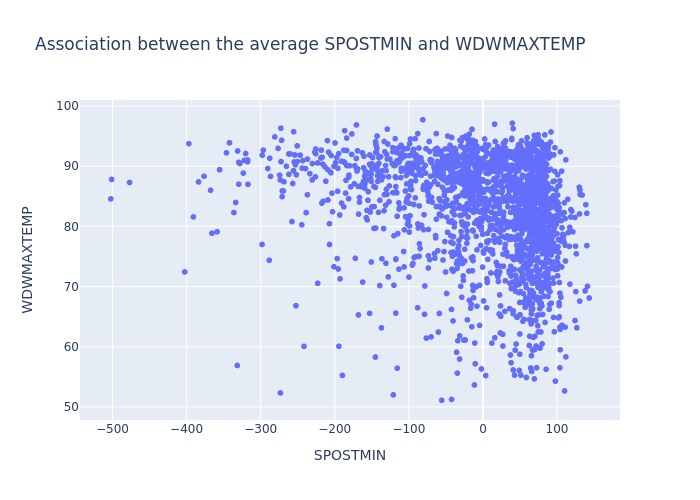

In [70]:
pqdata["day"] = pd.to_datetime(pqdata["date"])
grouped = pqdata.groupby(['ride_name', 'day']).mean()
grouped.reset_index("ride_name", inplace=True)
grouped.reset_index("day", inplace=True)

grouped = grouped.query("ride_name == '7_dwarfs_train'")

meta["DATE"] = pd.to_datetime(meta["DATE"])
grouped = pd.merge(grouped, meta, left_on="day", right_on="DATE")


fig = px.scatter(grouped, x="SPOSTMIN", y="WDWMAXTEMP", title="Association between the average SPOSTMIN and WDWMAXTEMP")
fig.show(renderer="jpg")


Markdown notes and sentences and analysis written here.

## Question 4

Markdown notes and sentences and analysis written here.

## Question 5

This is the average requests per second the server can respond to.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.